In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_csv('TrainingData.csv', low_memory=False)
data.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,10,0.63899,na,0,C,10,770,4,3080,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,13,0.63836,na,na,L,732,437,5,2185,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,1,1.00000,na,0,C,89,795,4,3180,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,3,0.53241,0,0,L,3,755,4,3020,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,1,0.92665,na,na,L,5,425,4,1700,0


In [73]:
data = data.replace(to_replace = 'na', value = np.nan, regex = False)
data = data.replace(to_replace = 'missing', value = np.nan, regex = False)
data = data.replace(to_replace = '#VALUE!', value = -1, regex = False)

In [74]:
col = ['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46', 'mvar48',
       'mvar49', 'mvar50', 'mvar51']
for i in col:
    data[i] = data[i].astype('float64')

In [75]:
cat_cols = []
for cols in data:
    if cols == 'default_ind':
        continue
    num = data[cols].unique().size
    if num <= 30:
        cat_cols.append(cols)

In [76]:
print(cat_cols)

['mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar34', 'mvar35', 'mvar39', 'mvar45', 'mvar46', 'mvar47', 'mvar50']


In [77]:
num_cols = [i for i in data.columns if i not in cat_cols and i != 'default_ind']

In [78]:
print(num_cols)

['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar36', 'mvar37', 'mvar38', 'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44', 'mvar48', 'mvar49', 'mvar51']


In [79]:
null_cols = []
for cols in data:
    if data[cols].isnull().sum()/83000 >= 0.3:
        null_cols.append(cols)

In [80]:
print(null_cols)

['mvar11', 'mvar15', 'mvar22', 'mvar23', 'mvar30', 'mvar31', 'mvar35', 'mvar40', 'mvar41', 'mvar45']


In [81]:
corrs = data.corr() 

threshold = 0.7
buf = []

for cols1 in corrs:
    buf.append(cols1)
    for cols2 in corrs:
        if cols2 not in buf:
            val = corrs.loc[cols1, cols2]
            if abs(val) >= threshold:
                print(f'{cols1}, {cols2}:{val}')

mvar1, mvar42:-0.7743396625511232
mvar1, mvar50:0.7909177290395599
mvar4, mvar46:0.8817110647852113
mvar7, mvar10:0.892973116736524
mvar9, mvar32:0.718002549421013
mvar16, mvar17:0.9374173170216952
mvar16, mvar18:0.928629316362157
mvar17, mvar18:0.9897991981977573
mvar19, mvar20:0.985329675603559
mvar21, mvar22:0.7036380777721649
mvar22, mvar23:0.8945648407025417
mvar25, mvar26:0.7085668467676325
mvar25, mvar27:0.7559996777476152
mvar26, mvar27:0.9133317378330063
mvar32, mvar37:0.8664394304224051


In [82]:
#[42,50, 4, 7, 9, 16, 17, 20,26,27]

In [83]:
corrs['default_ind']

application_key    0.004117
mvar1             -0.368350
mvar2              0.206396
mvar3              0.180356
mvar4              0.129412
mvar5              0.085536
mvar6             -0.135156
mvar7             -0.097629
mvar8             -0.195159
mvar9             -0.179666
mvar10            -0.149656
mvar11             0.027521
mvar12            -0.045496
mvar13            -0.087363
mvar14             0.001922
mvar15            -0.106269
mvar16             0.237592
mvar17             0.235242
mvar18             0.231353
mvar19             0.111349
mvar20             0.105365
mvar21             0.278938
mvar22             0.281273
mvar23             0.274292
mvar24             0.058889
mvar25            -0.191359
mvar26            -0.192040
mvar27            -0.193599
mvar28            -0.198825
mvar29            -0.187419
mvar30            -0.109114
mvar31            -0.108861
mvar32            -0.193772
mvar33            -0.125520
mvar34             0.134574
mvar35             0

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            79267 non-null  float64
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            63299 non-null  float64
 7   mvar7            75326 non-null  float64
 8   mvar8            63291 non-null  float64
 9   mvar9            71318 non-null  float64
 10  mvar10           82465 non-null  float64
 11  mvar11           36283 non-null  float64
 12  mvar12           68422 non-null  float64
 13  mvar13           73311 non-null  float64
 14  mvar14           83000 non-null  float64
 15  mvar15           49481 non-null  float64
 16  mvar16           63757 non-null  float64
 17  mvar17      

In [85]:
remove = [11, 15, 22, 23, 30, 31, 35, 40, 41, 45, 42, 50, 4, 7, 9, 16, 17, 20, 26, 27]

removed = [f'mvar{i}' for i in remove]
chosen = [i for i in data.columns if i not in removed]

ccat_cols = [i for i in cat_cols if i in chosen]
cnum_cols = [i for i in num_cols if i in chosen]

In [86]:
print(ccat_cols)

['mvar18', 'mvar19', 'mvar34', 'mvar39', 'mvar46', 'mvar47']


In [87]:
print(cnum_cols)

['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar5', 'mvar6', 'mvar8', 'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar21', 'mvar24', 'mvar25', 'mvar28', 'mvar29', 'mvar32', 'mvar33', 'mvar36', 'mvar37', 'mvar38', 'mvar43', 'mvar44', 'mvar48', 'mvar49', 'mvar51']


In [88]:
df = data[['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar5', 'mvar6', 'mvar8', 'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar21', 'mvar24', 'mvar25', 'mvar28', 'mvar29', 'mvar32', 'mvar33', 'mvar36', 'mvar37', 'mvar38', 'mvar43', 'mvar44', 'mvar48', 'mvar49', 'mvar51','mvar18', 'mvar19', 'mvar34', 'mvar39', 'mvar46', 'mvar47']]

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            79267 non-null  float64
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar5            82465 non-null  float64
 5   mvar6            63299 non-null  float64
 6   mvar8            63291 non-null  float64
 7   mvar10           82465 non-null  float64
 8   mvar12           68422 non-null  float64
 9   mvar13           73311 non-null  float64
 10  mvar14           83000 non-null  float64
 11  mvar21           59538 non-null  float64
 12  mvar24           63470 non-null  float64
 13  mvar25           75138 non-null  float64
 14  mvar28           82465 non-null  float64
 15  mvar29           82465 non-null  float64
 16  mvar32           75138 non-null  float64
 17  mvar33      

In [91]:
for cols in df:
    if cols in ccat_cols:
        df[cols].fillna(df[cols].mode()[0],inplace=True)
    if cols in cnum_cols:
        df[cols].fillna(df[cols].mean(),inplace=True)

c:\python\python38\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            83000 non-null  float64
 2   mvar2            83000 non-null  float64
 3   mvar3            83000 non-null  float64
 4   mvar5            83000 non-null  float64
 5   mvar6            83000 non-null  float64
 6   mvar8            83000 non-null  float64
 7   mvar10           83000 non-null  float64
 8   mvar12           83000 non-null  float64
 9   mvar13           83000 non-null  float64
 10  mvar14           83000 non-null  float64
 11  mvar21           83000 non-null  float64
 12  mvar24           83000 non-null  float64
 13  mvar25           83000 non-null  float64
 14  mvar28           83000 non-null  float64
 15  mvar29           83000 non-null  float64
 16  mvar32           83000 non-null  float64
 17  mvar33      

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

df['mvar47'] = np.where(df['mvar47'] == 'C', 0, 1)
X = df.drop(['application_key'], axis=1)
Y = data['default_ind']

<ipython-input-93-00e82fa7a63c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mvar47'] = np.where(df['mvar47'] == 'C', 0, 1)


In [94]:
from sklearn.preprocessing import StandardScaler
# Scaling the test dataset
scaler = StandardScaler()

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
import lightgbm as lgbm
lg = lgbm.LGBMClassifier(boosting_type = 'gbdt', max_depth = 5, n_estimators = 100)
lg.fit(X_train,Y_train)
Y_train_pred = lg.predict(X_train)
accuracy_score(Y_train,Y_train_pred)

0.790223752151463

In [51]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = lg, param_grid = {'boosting_type':['gbdt','dart','goss'], 'n_estimators':[25,50,75,100],'max_depth':[5,10,15,20]}, cv = 5, refit = True)
grid.fit(X_train,Y_train)
grid.best_params_

{'boosting_type': 'gbdt', 'max_depth': 5, 'n_estimators': 100}

In [53]:
Y_pred = lg.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7591566265060241

Text(0, 0.5, 'Variance Explained in dataset ')

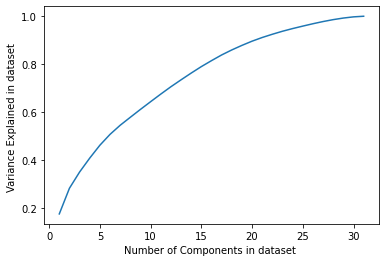

In [96]:
from sklearn.decomposition import PCA
X = scaler.fit_transform(X)
explained_variance= []
for i in range(1,32):
    pca=PCA(n_components=i)
    pca.fit(X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
plt.plot(range(1,32),explained_variance)
plt.xlabel("Number of Components in dataset ")
plt.ylabel("Variance Explained in dataset ")

In [97]:
pca=PCA(0.9)
X_pca=pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_train,X_test,Y_train,Y_test = train_test_split(X_pca,Y,test_size = 0.3,random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [98]:
from sklearn.neural_network import MLPClassifier
mlp =  MLPClassifier(max_iter = 1000)
#mlp = MLPClassifier(hidden_layer_sizes=(20,10,5),max_iter = 1000,activation = 'relu',solver='adam',random_state=1)
mlp.fit(X_train,Y_train)
Y_pred_train = mlp.predict(X_train)
accuracy_score(Y_train,Y_pred_train)


0.7808950086058519

In [99]:
Y_pred = mlp.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7594779116465863

In [65]:
## Test evaluation

test_data = pd.read_csv('testX.csv', low_memory=False)

test_data = test_data.replace(to_replace = 'na', value = np.nan, regex = False)
test_data = test_data.replace(to_replace = 'missing', value = np.nan, regex = False)
test_data = test_data.replace(to_replace = '#VALUE!', value = -1, regex = False)

for i in col:
    test_data[i] = test_data[i].astype('float64')

test_data_1 = test_data[['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar5', 'mvar6', 'mvar8', 'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar21', 'mvar24', 'mvar25', 'mvar28', 'mvar29', 'mvar32', 'mvar33', 'mvar36', 'mvar37', 'mvar38', 'mvar43', 'mvar44', 'mvar48', 'mvar49', 'mvar51','mvar18', 'mvar19', 'mvar34', 'mvar39', 'mvar46', 'mvar47']]

for cols in test_data_1:
    if cols in ccat_cols:
        test_data_1[cols].fillna(test_data_1[cols].mode()[0],inplace=True)
    if cols in cnum_cols:
        test_data_1[cols].fillna(test_data_1[cols].mean(),inplace=True)


test_data_1['mvar47'] = np.where(test_data_1['mvar47'] == 'C', 0, 1)
test_data_new = test_data_1.drop(['application_key'], axis=1)
# Scaling the test dataset
scaler = StandardScaler()
test_data_new = scaler.fit_transform(test_data_new)


c:\python\python38\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-65-9df2f7a4fbef>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_1['mvar47'] = np.where(test_data_1['mvar47'] == 'C', 0, 1)


In [66]:
pred = mlp.predict(test_data_new)
pred = pred.astype('int32')
# Formation of csv file containing the predicted values
Y_testing = pd.DataFrame(pred, columns=['Predicted'])
result = pd.concat([test_data['application_key'], Y_testing], join='outer', axis=1)
print(result)
result.to_csv('PPKS_12.csv', index=False, header=False)

       application_key  Predicted
0               578069          0
1               578070          0
2               578071          0
3               578072          0
4               578073          0
...                ...        ...
46995           310027          0
46996           310028          0
46997           310029          1
46998           310030          0
46999           310031          0

[47000 rows x 2 columns]
